# **CIFAR dataset**

In [1]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 35.3 MB/s eta 0:00:00


# **Importing Dependencies**

In [2]:
import os
import cv2
import py7zr
import numpy as np
import pandas as pd
from PIL import Image
from zipfile import ZipFile
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
import warnings
warnings.filterwarnings('ignore')

# **json file path configuration**

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Downloading the file**

In [4]:
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:07<00:00, 101MB/s] 
100% 715M/715M [00:09<00:00, 75.3MB/s]


# **Extracting the ZIP file**

In [5]:
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Extracting .7z file**

In [6]:
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [7]:
train_data_img = os.listdir('/content/train')

In [8]:
type(train_data_img)

list

In [9]:
len(train_data_img)

50000

In [10]:
print(train_data_img[0:10])

['39332.png', '19922.png', '37962.png', '46820.png', '39059.png', '22964.png', '6272.png', '23325.png', '2225.png', '13275.png']


# **Loading the Label dataset**

In [11]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [12]:
labels_df.shape

(50000, 2)

In [13]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


# **Getting the unique label value**

In [14]:
labels_df['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [15]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


### **So dataset is balanced**

# **Applying unique value on each labels**

In [16]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [17]:
print(labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


# **Displaying sample image**

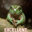

In [18]:
img = cv2.imread('/content/train/5000.png')
cv2_imshow(img)

# **Making the list of Image's ID**

In [19]:
id_list = list(labels_df['id'])

In [20]:
print(id_list[0:15])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


# **Convert images to numpy arrays**

In [21]:
train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [22]:
type(data[0])

numpy.ndarray

# **Checking the shape of image**

In [23]:
data[0].shape

(32, 32, 3)

# **Convert image list and label list to numpy arrays**

In [24]:
X = np.array(data)
Y = np.array(labels)

In [25]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


# **Splitting into train-test data**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


# **Scaling the data**

In [28]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

# **Defining ResNet50**

In [29]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
num_of_classes = 10

model = models.Sequential([
    layers.UpSampling2D((2, 2)),
    layers.UpSampling2D((2, 2)),
    layers.UpSampling2D((2, 2)),
    convolutional_base,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_of_classes, activation='softmax')
])

In [31]:
# model(X_train_scaled[:1])

In [32]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 437s 334ms/step - accuracy: 0.3131 - loss: 2.0787 - val_accuracy: 0.7552 - val_loss: 0.8746
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 410s 336ms/step - accuracy: 0.6602 - loss: 1.1086 - val_accuracy: 0.8923 - val_loss: 0.4787
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - accuracy: 0.7907 - loss: 0.7844 - val_accuracy: 0.9190 - val_loss: 0.3487
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - accuracy: 0.8607 - loss: 0.5968 - val_accuracy: 0.9340 - val_loss: 0.2942
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - accuracy: 0.9028 - loss: 0.4722 - val_accuracy: 0.9355 - val_loss: 0.2601
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - accuracy: 0.9323 - loss: 0.3704 - val_accuracy: 0.9392 - val_loss: 0.2376
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 336ms/step - accuracy: 0.9533 - loss: 0.2932 - val_accuracy: 0.9423 - val_loss: 0.2232
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 373s 328ms/step - ac

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.9353 - loss: 0.2387
Test Accuracy = 0.9386000037193298


# **Plotting the loss value and accuracy value**

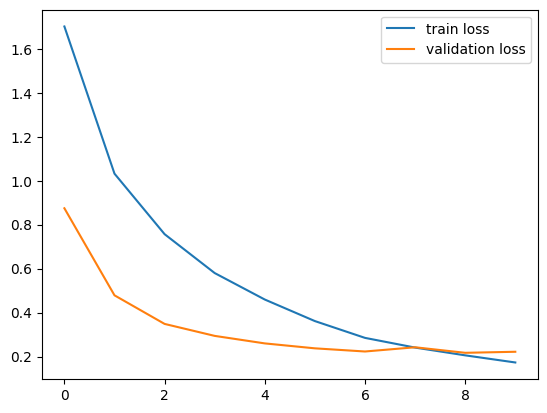

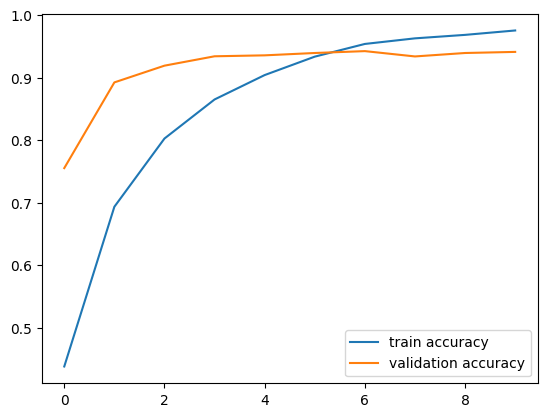

In [35]:
hist = history

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

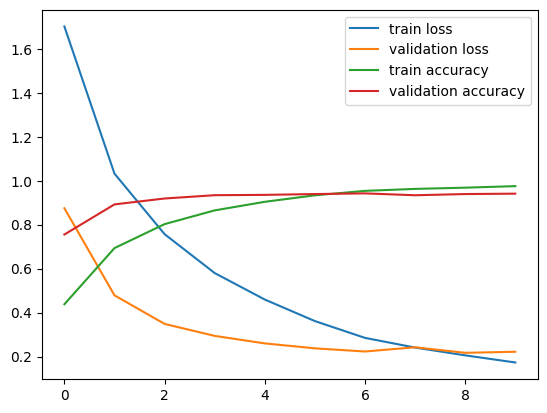

In [36]:
hist = history

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [37]:
model.save('cifar10_resnet50_model.h5')
